In [1]:
import matplotlib.pyplot as plt
import numpy as np
from protozfits.simple import File
from pedestal import PedestalSimple, remove_pedestal
from event import Event
from tools import plot_hist

## Calibration with file "Run021.1.fits.fz"

In [2]:
N1 = 40000
f1 = File("../data/Run021.1.fits.fz")
ped = PedestalSimple()
for i in range(0, N1):
    ev = next(f1.Events)
    Ev = Event(ev)
    Ev.read()
    ped.fill_pedestal_event(Ev)

ped.finalize_pedestal()
print("Finish calcurate pedestal")

Finish calcurate pedestal


## Substract pedestal for "Run026.1.fits.fz"

In [ ]:
f2 = File("../data/Run026.1.fits.fz")
N2 = 4000
event_hi_gain_before_remove_pedestal = np.zeros((N2, 8, 40))
event_hi_gain_after_remove_pedestal = np.zeros((N2, 8, 40))
event_low_gain_before_remove_pedestal = np.zeros((N2, 8, 40))
event_low_gain_after_remove_pedestal = np.zeros((N2, 8, 40))

for i in range(0, N2):
    ev = next(f2.Events)
    Ev = Event(ev)
    Ev.read()
    event_hi_gain_before_remove_pedestal[i, :, :] = Ev.samples_high_gain
    event_low_gain_before_remove_pedestal[i, :, :] = Ev.samples_low_gain
    remove_pedestal(Ev, ped)
    event_hi_gain_after_remove_pedestal[i, :, :] = Ev.samples_high_gain
    event_low_gain_after_remove_pedestal[i, :, :] = Ev.samples_low_gain

%matplotlib qt
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [10, 5]
plot_hist(event_hi_gain_before_remove_pedestal, "Hi Gain")
plot_hist(event_hi_gain_after_remove_pedestal, "Hi Gain")
plot_hist(event_low_gain_before_remove_pedestal, "Low Gain")
plot_hist(event_low_gain_after_remove_pedestal, "Low Gain")
plt.show()

## Substract pedestal for "Run027.1.fits.fz"

In [ ]:
f3 = File("../data/Run027.1.fits.fz")
N3 = 10000
event_hi_gain_before_remove_pedestal = np.zeros((N3, 8, 40))
event_hi_gain_after_remove_pedestal = np.zeros((N3, 8, 40))
event_low_gain_before_remove_pedestal = np.zeros((N3, 8, 40))
event_low_gain_after_remove_pedestal = np.zeros((N3, 8, 40))

for i in range(0, N3):
    ev = next(f3.Events)
    Ev = Event(ev)
    Ev.read()
    event_hi_gain_before_remove_pedestal[i, :, :] = Ev.samples_high_gain
    event_low_gain_before_remove_pedestal[i, :, :] = Ev.samples_low_gain
    remove_pedestal(Ev, ped)
    event_hi_gain_after_remove_pedestal[i, :, :] = Ev.samples_high_gain
    event_low_gain_after_remove_pedestal[i, :, :] = Ev.samples_low_gain

%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [10, 5]
plot_hist(event_hi_gain_before_remove_pedestal, "Hi Gain")
plot_hist(event_hi_gain_after_remove_pedestal, "Hi Gain")
plot_hist(event_low_gain_before_remove_pedestal, "Low Gain")
plot_hist(event_low_gain_after_remove_pedestal, "Low Gain")
plt.show()

## Plot for CH 1 Hi Gain

In [ ]:
%matplotlib qt
plt.rcParams.update({'font.size': 32})
fig, (ax0, ax1) = plt.subplots(ncols = 2)

sigma_before = np.std(event_hi_gain_before_remove_pedestal[:, 0, 2:38].ravel())
mu_before = np.mean(event_hi_gain_before_remove_pedestal[:, 0, 2:38].ravel())
ax0.hist(event_hi_gain_before_remove_pedestal[:, 0, 2:38].ravel(), bins=50)
ax0.set_xlabel("signal [counts]")
ax0.set_ylabel("number of events")
ax0.set_title("Before")
textstr = '$\mu=%.2f$\n $\sigma=%.2f$' % (mu_before, sigma_before)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax0.text(0.05, 0.95, textstr, transform=ax0.transAxes, fontsize=32, verticalalignment='top', bbox=props)
ax0.set_xlim([195, 405])
ax0.grid()

sigma_after = np.std(event_hi_gain_after_remove_pedestal[:, 0, 2:38].ravel())
mu_after = np.mean(event_hi_gain_after_remove_pedestal[:, 0, 2:38].ravel())
ax1.hist(event_hi_gain_after_remove_pedestal[:, 0, 2:38].ravel(), bins=50)
ax1.set_xlabel("signal [counts]")
ax1.set_ylabel("number of events")
ax1.set_title("After")
textstr = '$\mu=%.2f$\n $\sigma=%.2f$' % (mu_after, sigma_after)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=32, verticalalignment='top', bbox=props)
ax1.set_xlim([-105, 105])
ax1.grid()
plt.show()

In [ ]:
%matplotlib qt
plt.rcParams.update({'font.size': 32})

fig, (ax0, ax1) = plt.subplots(nrows = 2)

ax0.plot(event_hi_gain_before_remove_pedestal[3, 0, 0:40], 'b-', lw=3)
ax0.set_ylabel("signal [counts]")
ax0.set_xlabel("time sample [ns]")
ax0.axhline(color='k', lw=1)
ax0.set_ylim([-80, 500])
ax0.grid()

ax1.plot(event_hi_gain_after_remove_pedestal[3, 0, 0:40], 'b-', lw=3)
ax1.set_ylabel("signal [counts]")
ax1.set_xlabel("time sample [ns]")
ax1.set_ylim([-80, 500])
ax1.axhline(color='k', lw=1)
plt.grid(True)
plt.show()

## Find spike

1
old:  3604.0
new:  3605.0


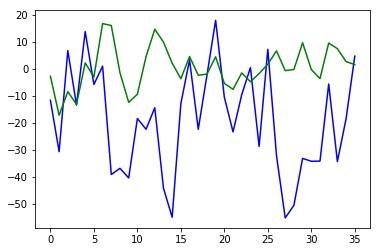

2
old:  3604.0
new:  3605.0


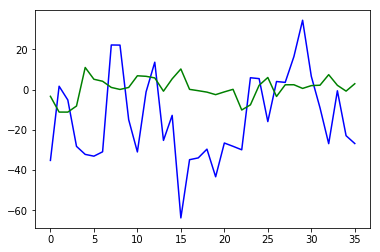

3
old:  3602.0
new:  3604.0


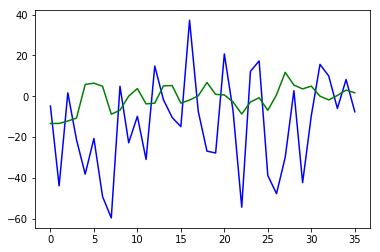

4
old:  3602.0
new:  3604.0


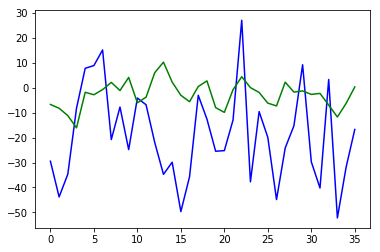

5
old:  3600.0
new:  3602.0


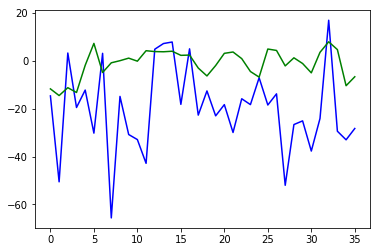

6
old:  3600.0
new:  3602.0


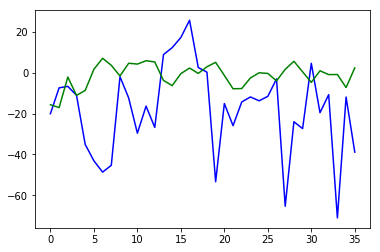

7
old:  3604.0
new:  3605.0


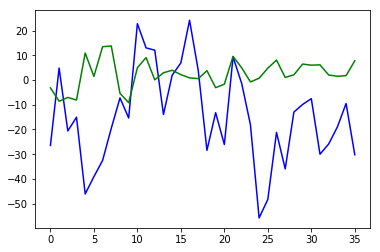

8
old:  3604.0
new:  3605.0


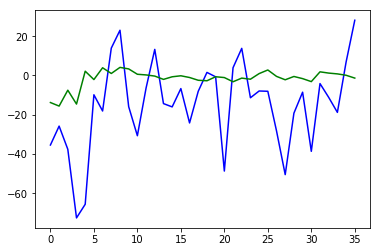

In [ ]:
f4 = File("../data/Run027.1.fits.fz")
N4 = 15000
event_hi_gain_before_remove_pedestal = np.zeros((N4, 8, 40))
event_hi_gain_after_remove_pedestal = np.zeros((N4, 8, 40))
fc_hg_old = np.zeros(8)

ev = next(f4.Events)
Ev = Event(ev)
Ev.read()
item = 0
for i in range(0, N4):
    event_hi_gain_before_remove_pedestal[i, :, :] = Ev.samples_high_gain
    remove_pedestal(Ev, ped)
    event_hi_gain_after_remove_pedestal[i, :, :] = Ev.samples_high_gain
    for j in range(0, 8):
            if Ev.first_capacitor_high_gain[j] > fc_hg_old[j] and Ev.first_capacitor_high_gain[j] < fc_hg_old[j]+40:
                item += 1
                print(item)
                print("old: ", fc_hg_old[j])
                print("new: ", Ev.first_capacitor_high_gain[j])  
                plt.plot(event_hi_gain_after_remove_pedestal[i-1, j, 2:38], 'b-')
                plt.plot(event_hi_gain_after_remove_pedestal[i, j, 2:38], 'g-')
                plt.show()
                
    fc_hg_old = Ev.first_capacitor_high_gain
    ev = next(f4.Events)
    Ev = Event(ev)
    Ev.read()
    
print("Finish ")    

   
        
    